In [1]:
import os
import numpy as np
import pandas as pd
import tqdm
import json
from matplotlib.colors import LinearSegmentedColormap
from picconfig import lgbpath, xgbpath, rfpath, predpath, phecodespath, phedefpath, temppath, numericpath
def form(dir):
    auc={}
    for i in os.listdir(dir):
        if '5w' not in i:
            cat=i.split('_')[1]
            try:
                d = np.load(os.path.join(dir, i), allow_pickle=True)
            except:
                d=[0,0,np.nan]
            if cat not in auc.keys():
                auc[cat]=[d[2]]
            else:
                auc[cat].append(d[2])
    return auc
lgb=form(lgbpath)
print(1)
xgb=form(xgbpath)
print(1)
rf=form(rfpath)
print(1)
raw={}
for i in os.listdir(predpath):
    if i.endswith('.npy'):
        if not i.endswith('lab.npy'):
            if not i.endswith('out.npy'):
                if not i.endswith('trainauc.npy'):
                    raw[i.split('.')[0]]=np.load(predpath+i)
best_perf={}
for i in range(1,7):
    for j in range(4):
        for k in range(1):
            temp=0
            mx=''
            for name in sorted(raw.keys()):
                if name[:3]==f'{i}{j}{k}':
                    if np.nanmean(raw[name])>=temp:
                        mx=name
                        temp=np.nanmean(raw[name])
            best_perf[f'{i}{j}{k}']=mx

1
1
1


In [2]:
best_perf

{'100': '100_3',
 '110': '110_7',
 '120': '120_9',
 '130': '130_2',
 '200': '200_4',
 '210': '210_6',
 '220': '220_9',
 '230': '230_4',
 '300': '300_2',
 '310': '310_3',
 '320': '320_9',
 '330': '330_4',
 '400': '400_3',
 '410': '410_6',
 '420': '420_9',
 '430': '430_6',
 '500': '500_3',
 '510': '510_6',
 '520': '520_9',
 '530': '530_4',
 '600': '600_5',
 '610': '610_6',
 '620': '620_9',
 '630': '630_5'}

In [3]:
cat5data={}
for k,v in best_perf.items():
    if v=='':
        continue
    if k[2]=='0':
        cat5data[k[:2]]=raw[v]
for k in lgb.keys():
    cat5data[str(k)+'4']=np.array(lgb[k])
for k in xgb.keys():
    cat5data[str(k)+'5']=np.array(xgb[k])
for k in rf.keys():
    cat5data[str(k)+'6']=np.array(rf[k])
reordered={}
order=np.array([6,5,4,2,0,3,1],dtype=str)
for i in range(len(order)):
    for j in range(1,7):
        reordered[f'{j}{i}']=cat5data[f'{j}{order[i]}']
cat5data=reordered

In [4]:
for k,v in cat5data.items():
    if len(v)!=1560:
        v+=[np.nan]*(1560-len(v))
    print(k,len(v))

10 1560
20 1560
30 1560
40 1560
50 1560
60 1560
11 1560
21 1560
31 1560
41 1560
51 1560
61 1560
12 1560
22 1560
32 1560
42 1560
52 1560
62 1560
13 1560
23 1560
33 1560
43 1560
53 1560
63 1560
14 1560
24 1560
34 1560
44 1560
54 1560
64 1560
15 1560
25 1560
35 1560
45 1560
55 1560
65 1560
16 1560
26 1560
36 1560
46 1560
56 1560
66 1560


In [5]:
phecodes_def = pd.read_csv(phedefpath)[['phecode', 'phenotype']]
phecodes = pd.read_csv(phecodespath)['Phecode']
phenotypes = [(phecodes_def['phenotype'][x==phecodes_def['phecode']]).item() for x in phecodes]

In [6]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.patches import Patch
import pandas as pd
modelnames=['Random Forest','XGBoost','LGBM','Logistic Regression','POPDx','CATI','FCNN',]
def interpret(s):
    try:
        cat,model,time,embed=s
    except:
        cat,model,time=s.split('_')
    if model=='A':
        model=10
    elif model=='B':
        model=11
    elif model=='C':
        model=12
    return int(cat)*1000+int(model)*10+int(embed)
def modelchar(x):
    if x >= 0 and x <= 9:
        return str(x)
    elif x >= 10:
        return chr(65 + x - 10)
def forminput(data,length=1568):
    div1=[]
    div2=[]
    length=data[list(data.keys())[0]].shape[0]
    for i in data.keys():
        t,s=i
        div1.append(t)
        div2.append(s)
    div1=np.unique(div1)
    div2=np.unique(div2)
    seqhue=[]
    seqgroup=[]
    seqdata=[]
    seqphecode = []
    seqindex = []
    for i in div1:
        for j in div2:
            try:
                seqdata+=list(data[i+j])
                seqhue+=[i]*length
                seqgroup+=[j]*length
                seqphecode += phenotypes
                seqindex += list(range(length))
            except:
                print(i+j)
    return  pd.DataFrame({'index': seqindex, 'phenotype': seqphecode,'group':seqgroup,'hue':seqhue,'data':seqdata})
ipt=forminput(cat5data)

In [7]:
ipt

,index,phenotype,group,hue,data
0,0,Intestinal infection,0,1,0.422603
1,1,Bacterial enteritis,0,1,0.687832
2,2,Intestinal e.coli,0,1,0.593496
3,3,Intestinal infection due to C. difficile,0,1,NaN
4,4,Viral Enteritis,0,1,0.523233
...,...,...,...,...,...
65515,1555,Late effect,6,6,0.619613
65516,1556,Asphyxia and hypoxemia,6,6,0.786676
65517,1557,"Effects of heat, cold and air pressure",6,6,0.715501
65518,1558,Effects of other external causes,6,6,0.699212


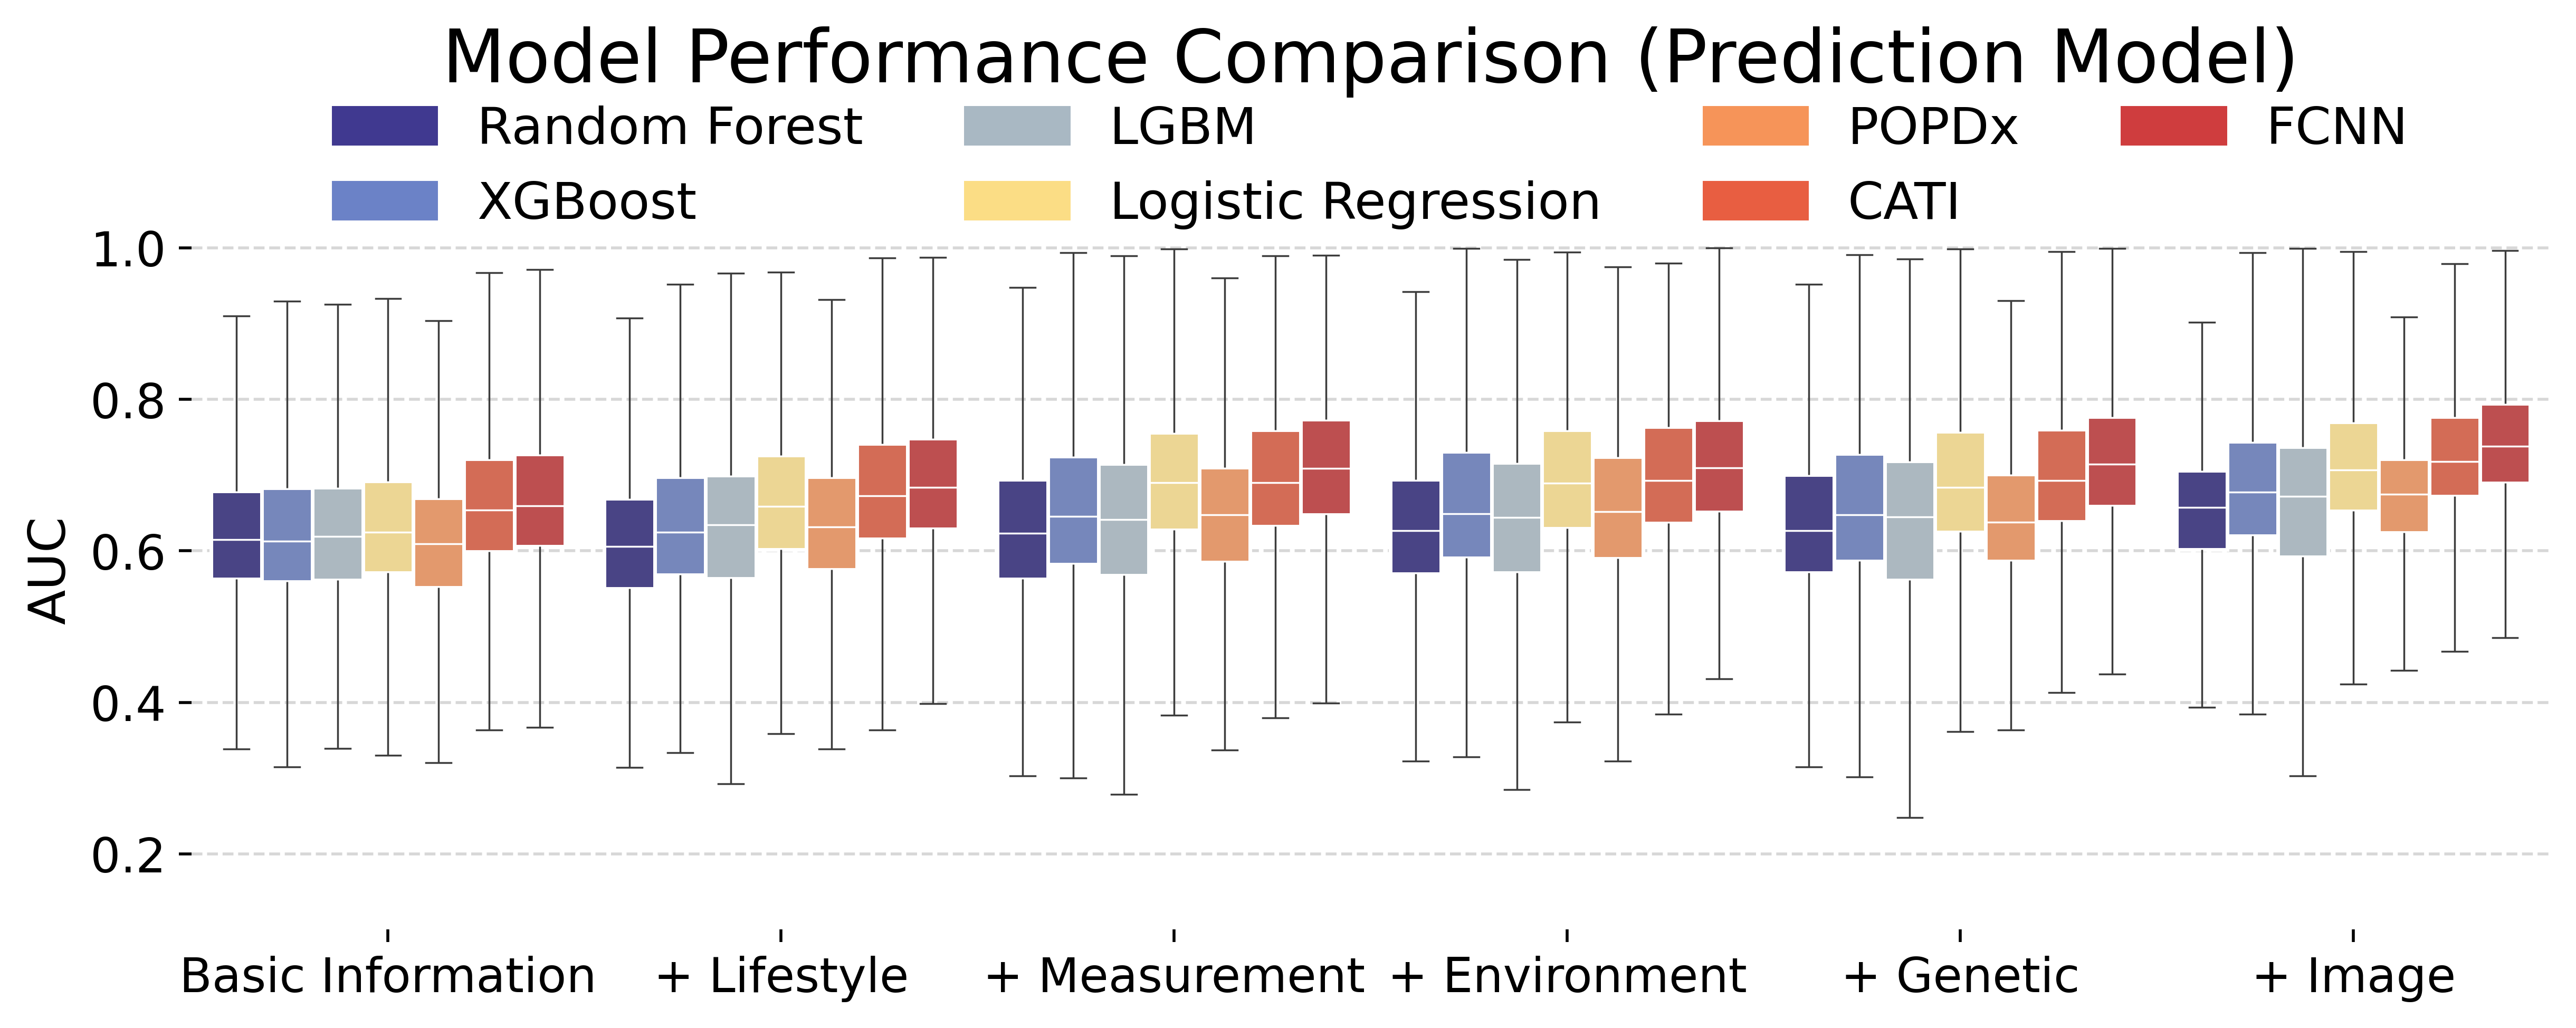

In [11]:
from matplotlib.patches import Patch
colors = ['#403990','#80A6E2','#FBDD85','#F46F43','#CF3D3E']
cm = LinearSegmentedColormap.from_list('Nature', colors, N=7)
colorlist = []
for i in range(7):
    colorlist.append(cm(i))
color_palette = sns.color_palette(colorlist)
plt.figure(dpi=500, figsize=(10,4))
# plt.locator_params(axis='y', nbins=11)
plt.grid(True,linestyle='--',alpha=0.5)
ax=sns.boxplot(y='data',x='hue',hue='group',palette=color_palette,data=ipt, whis=2, fliersize=0, notch=False,
            showfliers=True, width = 0.9, boxprops={'linewidth': 1, 'linestyle':"-", 'edgecolor':'white'}, whiskerprops={'linestyle': '-', 'linewidth': 0.5},
            capprops={'linewidth': 0.5}, medianprops={'linewidth': 0.5, 'color':'white'}, gap=0)
names=['Basic Information','+ Lifestyle','+ Measurement','+ Environment','+ Genetic', '+ Image']
plt.xticks(np.arange(len(names)), names, fontsize=13,rotation=0)
plt.yticks(fontsize=13)
legend_names=['Random Forest','XGBoost','LGBM','Logistic Regression','POPDx','CATI','FCNN',]
legend_handles=[]
for i in range(7):
    legend_handles.append(Patch(color=colorlist[i], label=legend_names[i]))
legend = plt.legend(handles=legend_handles, ncol=4,fontsize=14,loc='upper center',bbox_to_anchor=(0.5, 1.21))
legend.get_frame().set_linewidth(0)
legend.get_frame().set_facecolor('none') 
plt.ylim(0.1,1.05)
plt.xlabel("")
plt.ylabel("AUC", fontsize=14)
title = 'Model Performance Comparison (Prediction Model)'
plt.title(title, pad=35, fontsize=20)
plt.tight_layout()
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
plt.savefig(temppath + title + '.pdf', format='pdf',bbox_inches="tight")
plt.show()

In [12]:
d = ipt.groupby(['hue','group']).median('data').data.to_numpy()
m = {}
for i, name in enumerate(names):
    m[name] = list(d[(i*7):(i*7+7)])
json_file_path = numericpath + title + '.json'
with open(json_file_path, 'w', encoding='utf-8') as f:
    json.dump(m, f, ensure_ascii=False, indent=4)

In [13]:
lab=np.load(predpath + '0lab.npy')
totalpos=[]
for i in range(1560):
    totalpos.append(np.nansum(lab[:,i]))
    print(np.nansum(lab[:,i]))
sec=[-1,200,500000]
countcat=[]
for i in totalpos:
    for j in range(len(sec)-1):
        if sec[j]<=i<sec[j+1]:
            countcat.append(j)
seqdata=[]
seqgroup=[]
seqhue=[]
for i in range(7):
    t='6'+str(i)
    fd=np.array(cat5data[t])
    for j in range(len(np.array(cat5data[t]))):
        seqdata.append(fd[j])
        seqgroup.append(countcat[j])
        seqhue.append(i)
iptsec5=pd.DataFrame({'group':seqgroup,'hue':seqhue,'data':seqdata})
iptsec5

1869.0
305.0
45.0
229.0
354.0
13.0
2846.0
5.0
0.0
1298.0
297.0
126.0
1058.0
547.0
394.0
3.0
787.0
755.0
74.0
554.0
18.0
6.0
26.0
21.0
1.0
536.0
857.0
26.0
13.0
26.0
0.0
1429.0
639.0
279.0
189.0
247.0
1104.0
80.0
34.0
0.0
1.0
0.0
37.0
18.0
12.0
6.0
80.0
1.0
12.0
38.0
65.0
970.0
27.0
13.0
49.0
18.0
6.0
4.0
10.0
49.0
6.0
11.0
35.0
5.0
172.0
124.0
6.0
574.0
361.0
72.0
55.0
190.0
197.0
900.0
26.0
46.0
38.0
11.0
96.0
571.0
14.0
43.0
440.0
1990.0
189.0
9.0
231.0
1044.0
7.0
19.0
80.0
179.0
9.0
35.0
137.0
38.0
1120.0
64.0
19.0
13.0
5.0
461.0
187.0
13.0
112.0
343.0
30.0
17.0
44.0
9.0
103.0
48.0
14.0
84.0
3332.0
12.0
305.0
1044.0
630.0
404.0
673.0
184.0
585.0
45.0
327.0
175.0
28.0
32.0
227.0
211.0
44.0
107.0
79.0
16.0
8.0
87.0
8.0
44.0
15.0
8.0
530.0
3978.0
90.0
1178.0
47.0
33.0
446.0
311.0
119.0
1242.0
135.0
536.0
17.0
134.0
13.0
351.0
34.0
10.0
50.0
0.0
140.0
9.0
22.0
1.0
55.0
73.0
56.0
282.0
24.0
0.0
123.0
14.0
134.0
138.0
358.0
90.0
35.0
18.0
421.0
261.0
1874.0
35.0
16.0
0.0
36.0
300.0
1.0
25

,group,hue,data
0,1,0,NaN
1,1,0,0.615731
2,0,0,0.702338
3,1,0,NaN
4,1,0,0.624048
...,...,...,...
10915,0,6,0.619613
10916,0,6,0.786676
10917,0,6,0.715501
10918,1,6,0.699212


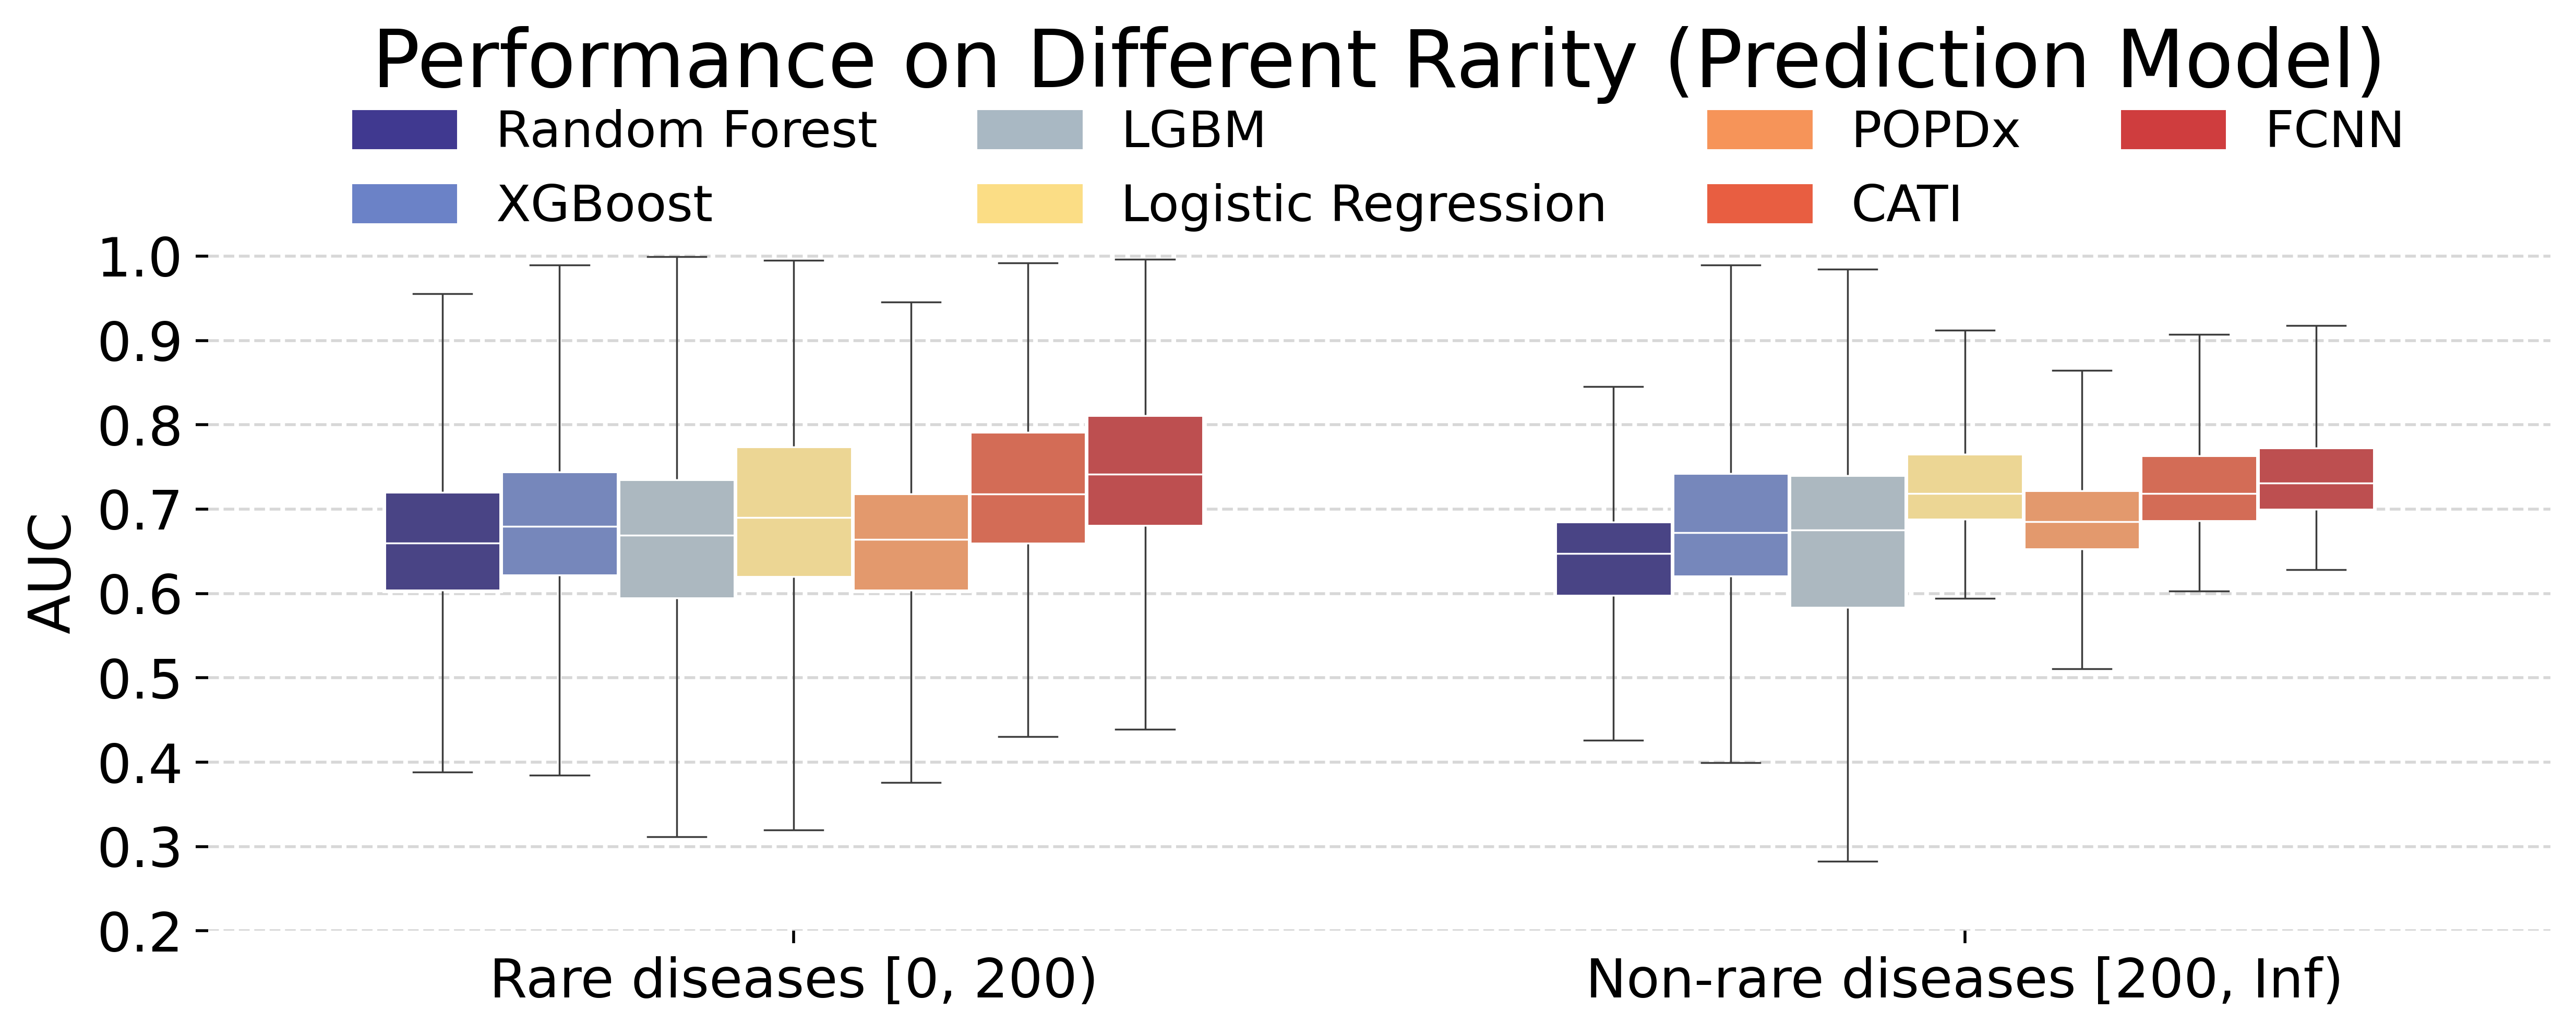

In [14]:
colors = ['#403990','#80A6E2','#FBDD85','#F46F43','#CF3D3E']
cm = LinearSegmentedColormap.from_list('Nature', colors, N=7)
colorlist = []
for i in range(7):
    colorlist.append(cm(i))
color_palette = sns.color_palette(colorlist)
plt.figure(dpi=500, figsize=(10,4))
plt.grid(True,linestyle='--',alpha=0.5)
ax=sns.boxplot(y='data',x='group',hue='hue',palette=color_palette,data=iptsec5, whis=2, fliersize=0, notch=False,
            showfliers=True, width = 0.7, boxprops={'linewidth': 1, 'linestyle':"-", 'edgecolor':'white'}, whiskerprops={'linestyle': '-', 'linewidth': 0.5},
            capprops={'linewidth': 0.5}, medianprops={'linewidth': 0.5, 'color':'white'}, gap=0)
title='Performance on Different Rarity (Prediction Model)'
plt.title(title, pad=35, fontsize=22)
legend_names=['Random Forest','XGBoost','LGBM','Logistic Regression','POPDx','CATI','FCNN',]
legend_handles=[]
for i in range(7):
    legend_handles.append(Patch(color=colorlist[i], label=legend_names[i]))
legend = plt.legend(handles=legend_handles, ncol=4,fontsize=14,loc='upper center',bbox_to_anchor=(0.5, 1.21))
legend.get_frame().set_linewidth(0)
legend.get_frame().set_facecolor('none') 
plt.ylim(0.2,1.05)
plt.xlabel("")
plt.ylabel("AUC", fontsize=16)
plt.tight_layout()
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
names=['Rare diseases [0, 200)','Non-rare diseases [200, Inf)',]
plt.xticks(np.arange(len(names)), names, fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.savefig(temppath + title + '.pdf', format='pdf',bbox_inches="tight")
plt.show()

In [15]:
d = iptsec5.groupby(['group','hue']).median().data.to_numpy()
m = {}
for i, name in enumerate(names):
    m[name] = list(d[(i*7):(i*7+7)])
json_file_path = numericpath + title + '.json'
with open(json_file_path, 'w', encoding='utf-8') as f:
    json.dump(m, f, ensure_ascii=False, indent=4)